<a href="https://colab.research.google.com/github/bhuvaneshkj/MachineLearning/blob/master/HeartPy_Detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob

import numpy as np
import scipy as sp
import scipy.io

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import random
import math

In [3]:
#install heartpy
!pip install heartpy

     |████████████████████████████████| 1.0 MB 5.0 MB/s 


In [5]:
def GetDataSet(name):

  df_ppg = pd.read_csv(name + ' PPG Data.csv', names=['Time', 'Voltage'], header=None)
  df_icm = pd.read_csv(name + ' ICM Data.csv', names=['time','Acc_x','Acc_y','Acc_z','Gyro_x','Gyro_y','Gyro_z'], header=None)  
  return df_ppg,df_icm

In [6]:
#df_ppg, df_icm = GetDataSet('Alex Cross')
df_ppg, df_icm = GetDataSet('Alex Hook')
#df_ppg, df_icm = GetDataSet('Alex Jab')
#df_ppg, df_icm = GetDataSet('Alex Uppercut')
#df_ppg, df_icm = GetDataSet('Ronny Cross')
#df_ppg, df_icm = GetDataSet('Ronny Hook')
#df_ppg, df_icm = GetDataSet('Ronny Jab')
#df_ppg, df_icm = GetDataSet('Ronny Kick 1')
#df_ppg, df_icm = GetDataSet('Ronny Kick 2')

In [7]:
import heartpy as hp

enhanced = hp.enhance_peaks(df_ppg['Voltage'], iterations=2)

In [8]:
enhanced

0        45.650477
1        45.465162
2        50.958033
3        53.539539
4        56.248910
           ...    
12355    58.770896
12356    58.995534
12357    59.770612
12358    59.640905
12359    63.150220
Name: Voltage, Length: 12360, dtype: float64

In [55]:
filtered = hp.filtering.filter_signal(df_ppg['Voltage'], cutoff = [0.6, 2], sample_rate = 100.0,order = 5, filtertype='bandpass')

In [56]:
filtered

array([ 0.01506657,  0.03420602,  0.05347759, ..., -0.0016357 ,
       -0.00146602, -0.00130397])

<Figure size 864x288 with 0 Axes>

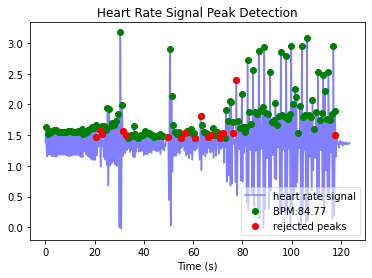

In [57]:
working_data, measures = hp.process(filtered, 100.0)
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)

In [58]:
filtered_hp = hp.hampel_filter(df_ppg['Voltage'], filtsize = 6)

In [59]:
filtered_hp

array([1.51325684, 1.51171875, 1.55544434, ..., 1.61872559, 1.61784668,
       1.6411377 ])

<Figure size 864x288 with 0 Axes>

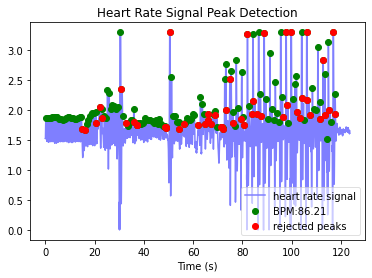

In [60]:
working_data, measures = hp.process(filtered_hp, 100.0)
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)

<Figure size 864x288 with 0 Axes>

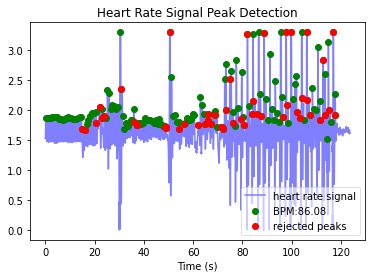

In [39]:
working_data, measures = hp.process(df_ppg['Voltage'], 100.0)
plt.figure(figsize=(12,4))
hp.plotter(working_data, measures)